Number of cores: 1, % Improvement: 17.94%
Number of cores: 2, % Improvement: 14.91%
Number of cores: 4, % Improvement: 17.68%
Number of cores: 16, % Improvement: 24.99%
Number of cores: 24, % Improvement: 25.61%
Number of cores: 48, % Improvement: 28.28%


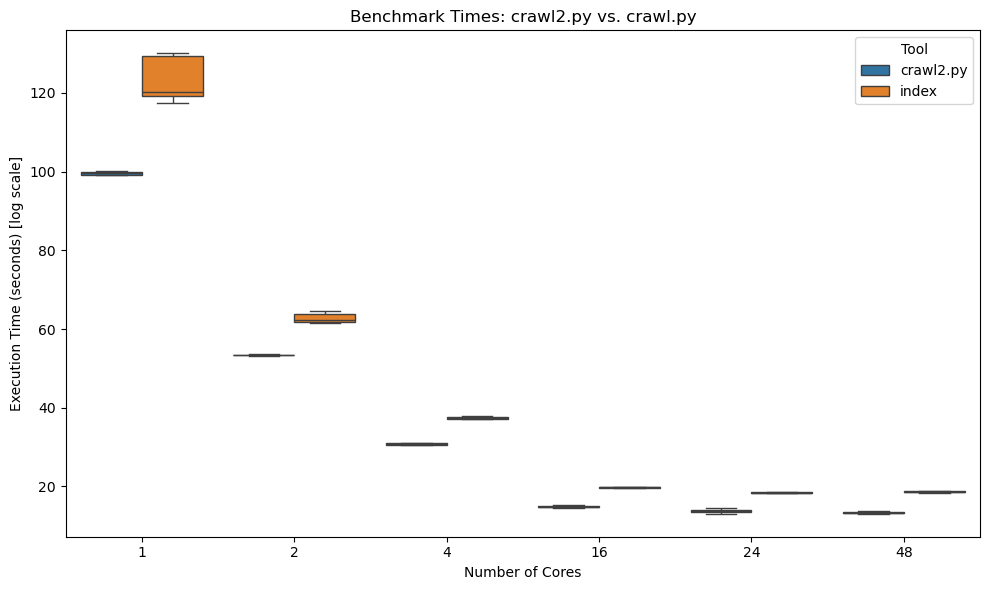

In [4]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# with open('benchmark.json', 'r') as f:
with Path.cwd().parent.joinpath(".imgtools", "benchmark.json").open("r") as f:
    data = json.load(f)

rows = []
for result in data["results"]:
    # # if num cores is less than 4, skip
    # if int(result["parameters"]["num_cores"]) < 4:
    #     continue

    command = result["command"]
    times = result["times"]
    cores = result["parameters"]["num_cores"]
    tool = "crawl2.py" if "crawl2.py" in command else "index"
    for t in times:
        rows.append({
            "num_cores": int(cores),
            "tool": tool,
            "time": t
        })

df = pd.DataFrame(rows)

# Calculate the mean time for each tool and core count
mean_times = df.groupby(['num_cores', 'tool'])['time'].mean().unstack()

# Calculate the percentage improvement
improvement = (mean_times['index'] - mean_times['crawl2.py']) / mean_times['index'] * 100

# Print the percentage improvement for each core count
for cores, imp in improvement.items():
    print(f"Number of cores: {cores}, % Improvement: {imp:.2f}%")

plt.figure(figsize=(10,6))
sns.boxplot(x="num_cores", y="time", hue="tool", data=df, showfliers=False)
# plt.yscale("log")
plt.title("Benchmark Times: crawl2.py vs. crawl.py")
plt.xlabel("Number of Cores")
plt.ylabel("Execution Time (seconds) [log scale]")
plt.legend(title="Tool")
plt.tight_layout()
plt.show()